In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
mydrive_carpeta = '/content/drive/MyDrive/ programacion/'

In [ ]:
diccionario = pd.read_excel(mydrive_carpeta + 'Diccionario de datos.xlsx')
print("$$$$$$$$$$   Diccionario de datos         $$$$$$$")
print(diccionario.head())
print(diccionario.info())

$$$$$$$$$$   Diccionario de datos         $$$$$$$
        Campo                        Descriptivo
0     Loan_ID                    ID del prestamo
1      Gender                             Género
2     Married                       estado civil
3  Dependents  número de dependientes a su cargo
4   Education                    Nivel Educativo
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Campo        13 non-null     object
 1   Descriptivo  13 non-null     object
dtypes: object(2)
memory usage: 340.0+ bytes
None


In [ ]:
# 2. Carga el dataset de préstamos
df = pd.read_csv(mydrive_carpeta + 'bd_loans_assessment.csv')
print("%%%%%%%% Primeras filas de bd_loans_assessment  %%%%%%%%%%%%%%%%")
print(df.head())
print(df.info())
print("$$$$$$$$$$$ Estadísticas generales  $$$$$$$$$$$$$$$$")
print(df.describe(include='all'))
print("################## Distribución de Loan_Status #####")
print(df['Loan_Status'].value_counts())

%%%%%%%% Primeras filas de bd_loans_assessment  %%%%%%%%%%%%%%%%
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1

In [ ]:
# Hacemos la  LIMPIEZA
df_limpio = df.copy()

# Limpio nombres de columnas
df_limpio.columns = df_limpio.columns.str.strip()

# Limpio strings en columnas tipo object
for col in df_limpio.select_dtypes(include="object"):
    df_limpio[col] = df_limpio[col].str.strip()
df_limpio["Dependents"] = (
    df_limpio["Dependents"].replace("3+", 3).astype(float)
)

#  Variables categóricas
cat_cols = [
    "Gender", "Married", "Education",
    "Self_Employed", "Property_Area",
    "Loan_Status", "Credit_History"
]
df_limpio[cat_cols] = df_limpio[cat_cols].astype("category")

#  Duplicados
print("Duplicados:", df_limpio.duplicated().sum())

# los valores que falta
na_counts = df_limpio.isna().sum()
print("\n -___-- Faltantes -----")
print(na_counts[na_counts > 0])

for col in na_counts[na_counts > 0].index:
    df_limpio[f"{col}_NA"] = df_limpio[col].isna().astype(int)


Duplicados: 0

 -___-- Faltantes -----
Gender              13
Married              3
Dependents          15
Education            7
Self_Employed       32
LoanAmount          25
Loan_Amount_Term    14
Credit_History      50
dtype: int64


In [ ]:
# PASO 1  ANÁLISIS UNIVARIADO
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1a
stats = df_limpio.describe(
    percentiles=[.01, .05, .25, .50, .75, .95, .99]
).T

print("\n   El RESUMEN ESTADÍSTICO ")
print(stats)


   El RESUMEN ESTADÍSTICO 
                     count         mean          std    min      1%       5%  \
Dependents           599.0     0.762938     1.015216    0.0     0.0     0.00   
ApplicantIncome      614.0  5403.459283  6109.041673  150.0  1025.0  1897.55   
CoapplicantIncome    614.0  1621.245798  2926.248369    0.0     0.0     0.00   
LoanAmount           589.0   146.405772    85.757311    9.0    30.0    56.00   
Loan_Amount_Term     600.0   342.000000    65.120410   12.0    84.0   180.00   
Gender_NA            614.0     0.021173     0.144077    0.0     0.0     0.00   
Married_NA           614.0     0.004886     0.069786    0.0     0.0     0.00   
Dependents_NA        614.0     0.024430     0.154506    0.0     0.0     0.00   
Education_NA         614.0     0.011401     0.106250    0.0     0.0     0.00   
Self_Employed_NA     614.0     0.052117     0.222445    0.0     0.0     0.00   
LoanAmount_NA        614.0     0.040717     0.197794    0.0     0.0     0.00   
Loan_Amount_

In [ ]:
# 1.b  Detección de outliers

num_cols = df_limpio.select_dtypes(include="number").columns
print("\n   j OUTLIERS  con 1.5·IQR ")
for col in num_cols:
    q1, q3 = df_limpio[col].quantile([.25, .75])
    iqr = q3 - q1
    lo, hi = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    n_out = df_limpio[(df_limpio[col] < lo) | (df_limpio[col] > hi)].shape[0]
    if n_out:
        print(f"{col}: {n_out} outliers [{lo:.1f}, {hi:.1f}]")



   j OUTLIERS  con 1.5·IQR 
ApplicantIncome: 50 outliers [-1498.8, 10171.2]
CoapplicantIncome: 18 outliers [-3445.9, 5743.1]
LoanAmount: 39 outliers [-2.0, 270.0]
Loan_Amount_Term: 88 outliers [360.0, 360.0]
Gender_NA: 13 outliers [0.0, 0.0]
Married_NA: 3 outliers [0.0, 0.0]
Dependents_NA: 15 outliers [0.0, 0.0]
Education_NA: 7 outliers [0.0, 0.0]
Self_Employed_NA: 32 outliers [0.0, 0.0]
LoanAmount_NA: 25 outliers [0.0, 0.0]
Loan_Amount_Term_NA: 14 outliers [0.0, 0.0]
Credit_History_NA: 50 outliers [0.0, 0.0]


In [ ]:
# 1.c Valores faltantes

na = df_limpio.isna().sum().sort_values(ascending=False)
print("\n  valores FALTANTES   ")
print(na[na > 0])


  valores FALTANTES   
Credit_History      50
Self_Employed       32
LoanAmount          25
Dependents          15
Loan_Amount_Term    14
Gender              13
Education            7
Married              3
dtype: int64


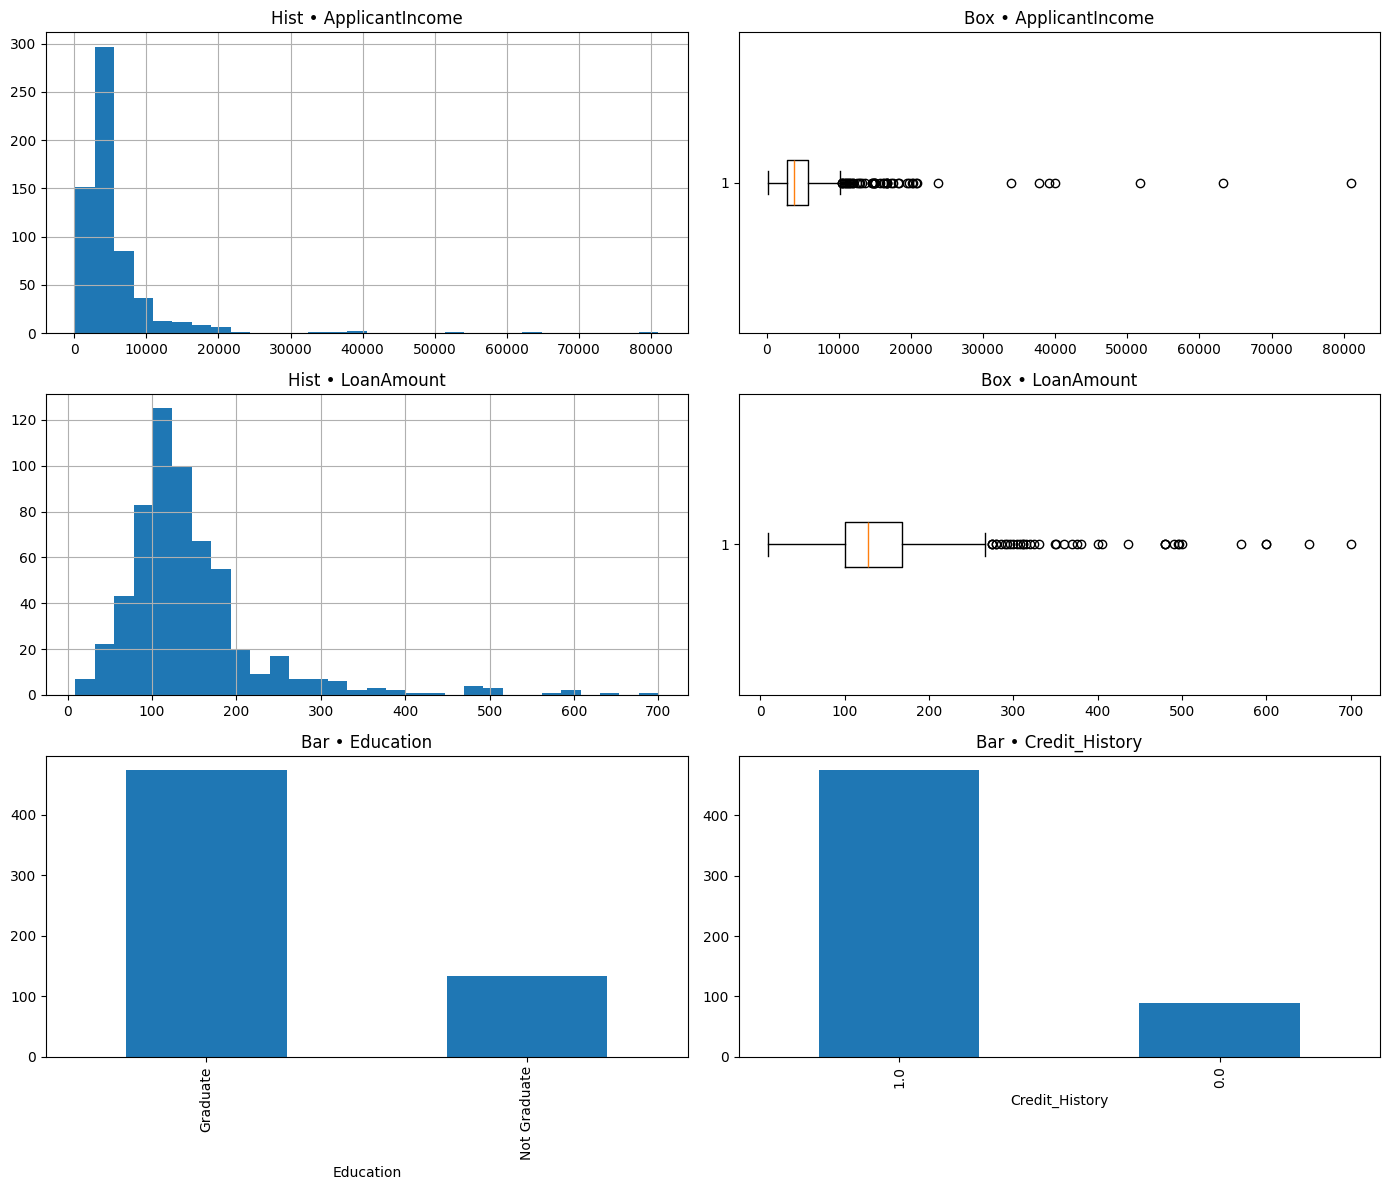

In [ ]:
# 1.d · Gráficos
plt.style.use("default")
fig, ax = plt.subplots(3, 2, figsize=(14, 12))

# 1) Applicant Income
df_limpio["ApplicantIncome"].hist(bins=30, ax=ax[0, 0])
ax[0, 0].set_title("Hist • ApplicantIncome")
ax[0, 1].boxplot(df_limpio["ApplicantIncome"].dropna(), vert=False)
ax[0, 1].set_title("Box • ApplicantIncome")

# 2) Loan Amount
df_limpio["LoanAmount"].hist(bins=30, ax=ax[1, 0])
ax[1, 0].set_title("Hist • LoanAmount")
ax[1, 1].boxplot(df_limpio["LoanAmount"].dropna(), vert=False)
ax[1, 1].set_title("Box • LoanAmount")

# 3) Education
df_limpio["Education"].value_counts().plot(kind="bar", ax=ax[2, 0])
ax[2, 0].set_title("Bar • Education")

# 4) Credit History
df_limpio["Credit_History"].value_counts().plot(kind="bar", ax=ax[2, 1])
ax[2, 1].set_title("Bar • Credit_History")

plt.tight_layout()
plt.show()



In [ ]:
#  EJERCICIO 2 FEATURE ENGINEERING
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
df_fe = df_limpio.copy()


In [ ]:
#Escalado de ingresos y montos
scaler = StandardScaler()
df_fe[['ApplicantIncome_std', 'LoanAmount_std']] = scaler.fit_transform(
    df_fe[['ApplicantIncome', 'LoanAmount']]
)

In [ ]:
#  Ratio Loan to Income
df_fe['Loan_to_Income'] = df_fe['LoanAmount'] * 1000 / df_fe['ApplicantIncome']


In [ ]:
#  Dummies de Property area
dummies = pd.get_dummies(df_fe['Property_Area'], prefix='Area', drop_first=True)
df_fe = pd.concat([df_fe, dummies], axis=1)

In [ ]:
# Flag de altos ingresos
q75 = df_fe['ApplicantIncome'].quantile(0.75)
df_fe['HighIncomeFlag'] = (df_fe['ApplicantIncome'] >= q75).astype(int)


In [ ]:
#Encoding simple de Education
df_fe['Education_LE'] = df_fe['Education'].map({
    'Graduate': 1,
    'Not Graduate': 0
})

In [ ]:
#/j

In [ ]:
new_cols = [
    'ApplicantIncome_std', 'LoanAmount_std',
    'Loan_to_Income', 'Area_Semiurban', 'Area_Urban',
    'HighIncomeFlag', 'Education_LE'
]
print("las nuuevas columnas son :", new_cols)
print(df_fe[new_cols].head())

las nuuevas columnas son : ['ApplicantIncome_std', 'LoanAmount_std', 'Loan_to_Income', 'Area_Semiurban', 'Area_Urban', 'HighIncomeFlag', 'Education_LE']
   ApplicantIncome_std  LoanAmount_std  Loan_to_Income  Area_Semiurban  \
0             0.072991             NaN             NaN           False   
1            -0.134412       -0.214809       27.929304           False   
2            -0.393747       -0.938394       22.000000           False   
3            -0.462062       -0.308175       46.457607           False   
4             0.097728       -0.063089       23.500000           False   

   Area_Urban  HighIncomeFlag Education_LE  
0        True               1            1  
1       False               0            1  
2        True               0            1  
3        True               0            0  
4        True               1            1  


In [ ]:
print("1) Weight of Evidence WOE:")
print("    Convierte cada categoría en el log de la proporción de buenos vs malos")
print("    Su  ventaja  del WOE es reducir el sesgo por categorías raras y mejora la linealidad.")
print()

print("2) Target Encoding:")
print("   EL TARGET encoding  sustituye cada categoría por la media de la variable objetivo como la tasa de aprobación")
print("    Útil para variables con muchas categorías pero puede se sobreajuste sin regularización.")
print()

print("3) Frequency Encoding:")
print("    Asigna a cada categoría la frecuencia con la que aparece en los datos")
print("    esto es muy rápido  ya que se captura información de prevalencia sin aumentar dimensionalidad")
print()

1) Weight of Evidence WOE:
    Convierte cada categoría en el log de la proporción de buenos vs malos
    Su  ventaja  del WOE es reducir el sesgo por categorías raras y mejora la linealidad.

2) Target Encoding:
   EL TARGET encoding  sustituye cada categoría por la media de la variable objetivo como la tasa de aprobación
    Útil para variables con muchas categorías pero puede se sobreajuste sin regularización.

3) Frequency Encoding:
    Asigna a cada categoría la frecuencia con la que aparece en los datos
    esto es muy rápido  ya que se captura información de prevalencia sin aumentar dimensionalidad



In [ ]:
#++


3


In [ ]:
#3 Sampling y Balanceo de datos (1 PUNTO)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC


In [ ]:
# 3.a · Split estratificado 70/30 (seed=45)
y = df_fe['Loan_Status'].map({'Y': 1, 'N': 0})
X = df_fe[
    ['ApplicantIncome_std', 'LoanAmount_std', 'Loan_to_Income',
     'Area_Semiurban', 'Area_Urban', 'HighIncomeFlag', 'Education_LE']
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=45
)

print("Train:", X_train.shape, "Test:", X_test.shape)
print("Proporción y_train:\n", y_train.value_counts(normalize=True).round(2))


Train: (429, 7) Test: (185, 7)
Proporción y_train:
 Loan_Status
1    0.69
0    0.31
Name: proportion, dtype: float64


In [ ]:
# "b" Imputación rápida para SMOTENC
num_cols = ['ApplicantIncome_std', 'LoanAmount_std', 'Loan_to_Income']
cat_cols = ['Area_Semiurban', 'Area_Urban', 'HighIncomeFlag', 'Education_LE']

In [ ]:
# Numéricas → mediana
for col in num_cols:
    med = X_train[col].median()
    X_train[col] = X_train[col].fillna(med)
    X_test[col]  = X_test[col].fillna(med)

# Categóricas → moda
for col in cat_cols:
    mode = X_train[col].mode()[0]
    X_train[col] = X_train[col].fillna(mode)
    X_test[col]  = X_test[col].fillna(mode)

print("\n¿Quedan NA en X_train?", X_train.isna().any().any())


¿Quedan NA en X_train? False


In [ ]:
# 3.b Balanceo con SMOTENC si la menor clase < 40%
minor_ratio = y_train.value_counts(normalize=True).min()
if minor_ratio < 0.40:
    cat_idx = [X.columns.get_loc(c) for c in cat_cols]
    smote = SMOTENC(categorical_features=cat_idx, random_state=45)
    X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)
    print("\nSMOTENC aplicado")
    print("Nueva proporción y_train:\n", y_train_bal.value_counts(normalize=True).round(2))
else:
    X_train_bal, y_train_bal = X_train, y_train
    print("\nNo se aplicó SMOTENC (clases razonablemente balanceadas)")


SMOTENC aplicado
Nueva proporción y_train:
 Loan_Status
0    0.5
1    0.5
Name: proportion, dtype: float64


4


In [ ]:
#  4  ANÁLISIS MULTIVARIADO

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import numpy as np
import pandas as pd


In [ ]:
X0 = X_train_bal.copy()
y0 = y_train_bal.copy()

In [ ]:
# filtro por correlación
corr = X0.corr().abs()
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.70)]

X1 = X0.drop(columns=to_drop_corr)
print("\n eliminadas por alta correlación >0.70:",
      to_drop_corr or "ninguna")
print("Quedan::", list(X1.columns))


 eliminadas por alta correlación >0.70: ninguna
Quedan:: ['ApplicantIncome_std', 'LoanAmount_std', 'Loan_to_Income', 'Area_Semiurban', 'Area_Urban', 'HighIncomeFlag', 'Education_LE']


In [ ]:
# RFE con Regresión Logística
n_keep = int(np.ceil(X1.shape[1] / 2))
logreg = LogisticRegression(solver='liblinear', random_state=45)

rfe = RFE(estimator=logreg, n_features_to_select=n_keep)
rfe.fit(X1, y0)

to_keep_rfe = X1.columns[rfe.support_]
to_drop_rfe = X1.columns[~rfe.support_]

X2 = X1[to_keep_rfe]
print("\n el  RFE mantuvo ", list(to_keep_rfe))
print("el RFE descarto", list(to_drop_rfe) or "ninguna")


 el  RFE mantuvo  ['ApplicantIncome_std', 'Area_Semiurban', 'Area_Urban', 'HighIncomeFlag']
el RFE descarto ['LoanAmount_std', 'Loan_to_Income', 'Education_LE']


In [ ]:
# 4.3 · VIF   cuando descarto  los vif menores a 5 y convieto  todo a float par evitar errores
def calc_vif(df_float):
    Xc = sm.add_constant(df_float)
    return pd.Series(
        [variance_inflation_factor(Xc.values, i)
         for i in range(1, Xc.shape[1])],
        index=df_float.columns, name="VIF"
    )

X2_float = X2.astype("float64")
vif_init  = calc_vif(X2_float)
to_drop_vif = vif_init[vif_init > 5].index.tolist()

X3 = X2_float.drop(columns=to_drop_vif)
print("\n Eliminadas por VIF > 5:",
      to_drop_vif or "Ninguna")
print(" VIF finales:\n", calc_vif(X3).round(2))


 Eliminadas por VIF > 5: Ninguna
 VIF finales:
 ApplicantIncome_std    1.62
Area_Semiurban         1.23
Area_Urban             1.24
HighIncomeFlag         1.63
Name: VIF, dtype: float64


In [ ]:
#  Set final
final_features = list(X3.columns)
print("\n=== FEATURES SELECCIONADAS ===")
print(final_features)


=== FEATURES SELECCIONADAS ===
['ApplicantIncome_std', 'Area_Semiurban', 'Area_Urban', 'HighIncomeFlag']


In [ ]:
# PROPUESTA DE MÉTODOS DE REDUCCIÓN DE VARIABLES
print("Propuesta secuencial de 3 métodos")
print(" Filtro por correlación")
print("  Elimina pares de variables que comparten mas de 70% de varianza")
print(" Tambien reduce redundancia antes de modelar")
print()
print(" ..............RFE  con RegLog")
print(" Selecciona las k variables más predictivas según un modelo base")
print("  tambien ordena las variables por su importancia para el target")
print()
print(" ---------------VIF mayor a  5")
print(" Detecta y descarta variables que generan multicolinealidad")
print("  tambien mejora la estabilidad e interpretabilidad del modelo")
print()
print("------------Secuencia lógica")
print(" Primero quitamos redundancias obvias ")
print(" Después mantenemos solo las variables con mayor aporte predictivo")
print("Finalmente aseguramos que las variables restantes no estén colineales VIF")
print()
print("como resultado se tiene un conjunto compacto, sin variables duplicadas, predictivo y estable ")




Propuesta secuencial de 3 métodos
 Filtro por correlación
  Elimina pares de variables que comparten mas de 70% de varianza
 Tambien reduce redundancia antes de modelar

 ..............RFE  con RegLog
 Selecciona las k variables más predictivas según un modelo base
  tambien ordena las variables por su importancia para el target

 ---------------VIF mayor a  5
 Detecta y descarta variables que generan multicolinealidad
  tambien mejora la estabilidad e interpretabilidad del modelo

------------Secuencia lógica
 Primero quitamos redundancias obvias 
 Después mantenemos solo las variables con mayor aporte predictivo
Finalmente aseguramos que las variables restantes no estén colineales VIF

como resultado se tiene un conjunto compacto, sin variables duplicadas, predictivo y estable 


In [ ]:
# 5 ENTRENAMIENTO DE MODELOS

In [ ]:
!pip -q install xgboost lightgbm catboost

In [ ]:
from sklearn.linear_model     import LogisticRegression
from sklearn.tree             import DecisionTreeClassifier
from sklearn.ensemble         import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost                  import XGBClassifier
from lightgbm                 import LGBMClassifier
from sklearn.metrics          import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

In [ ]:
try:
    from catboost import CatBoostClassifier
    HAVE_CATBOOST = True
except ImportError:
    print(" CatBoost no disponible: se omitirá ese modelo.")
    HAVE_CATBOOST = False


In [ ]:
#  Datos finales que saque anteriormente
X_train_f = X_train_bal[final_features]
X_test_f  = X_test[final_features]
y_train_f = y_train_bal
y_test_f  = y_test

In [ ]:
#Diccionarios
models = {
    "LogReg"          : LogisticRegression(max_iter=1000, solver="liblinear"),
    "DecisionTree"    : DecisionTreeClassifier(random_state=45),
    "RandomForest"    : RandomForestClassifier(n_estimators=200, random_state=45),
    "GradientBoosting": GradientBoostingClassifier(random_state=45),
    "AdaBoost"        : AdaBoostClassifier(random_state=45),
    "XGBoost"         : XGBClassifier(
        random_state=45, use_label_encoder=False, eval_metric="logloss"
    ),
    "LightGBM"        : LGBMClassifier(random_state=45)
}

In [ ]:
#se agregar si esta disponible el catboots
if HAVE_CATBOOST:
    models["CatBoost"] = CatBoostClassifier(verbose=0, random_state=45)

In [ ]:
# ❹  Entrenamiento y evaluación con umbral 0.60
results = []
for name, model in models.items():
    model.fit(X_train_f, y_train_f)

    # Predicciones probabilísticas
    y_prob = (
        model.predict_proba(X_test_f)[:, 1]
        if hasattr(model, "predict_proba")
        else model.decision_function(X_test_f)
    )
    y_pred = (y_prob >= 0.60).astype(int)

    # Métricas
    results.append({
        "Model"     : name,
        "Accuracy"  : round(accuracy_score(y_test_f, y_pred), 3),
        "Precision" : round(precision_score(y_test_f, y_pred), 3),
        "Recall"    : round(recall_score(y_test_f, y_pred), 3),
        "F1"        : round(f1_score(y_test_f, y_pred), 3)
    })


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:02:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 295, number of negative: 295
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 590, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

In [ ]:
#  Resultados ordenados por F1
results_df = pd.DataFrame(results).sort_values("F1", ascending=False)
print("\n=== COMPARATIVA DE MODELOS (umbral 0.60) ===")
print(results_df.to_string(index=False))


=== COMPARATIVA DE MODELOS (umbral 0.60) ===
           Model  Accuracy  Precision  Recall    F1
    DecisionTree     0.557      0.699   0.622 0.658
    RandomForest     0.551      0.696   0.614 0.653
        CatBoost     0.562      0.761   0.528 0.623
GradientBoosting     0.546      0.726   0.543 0.622
         XGBoost     0.541      0.723   0.535 0.615
        LightGBM     0.535      0.716   0.535 0.613
        AdaBoost     0.535      0.766   0.465 0.578
          LogReg     0.530      0.756   0.465 0.576


In [ ]:
#6 · COMPARACIÓN DE MODELOS

In [ ]:
#  COMPARACIÓN DE MODELOS


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print("\n COMPARATIVA F1 ")
print(results_df[['Model', 'F1', 'Precision', 'Recall']].to_string(index=False))


 COMPARATIVA F1 
           Model    F1  Precision  Recall
    DecisionTree 0.658      0.699   0.622
    RandomForest 0.653      0.696   0.614
        CatBoost 0.623      0.761   0.528
GradientBoosting 0.622      0.726   0.543
         XGBoost 0.615      0.723   0.535
        LightGBM 0.613      0.716   0.535
        AdaBoost 0.578      0.766   0.465
          LogReg 0.576      0.756   0.465


<Figure size 800x400 with 0 Axes>

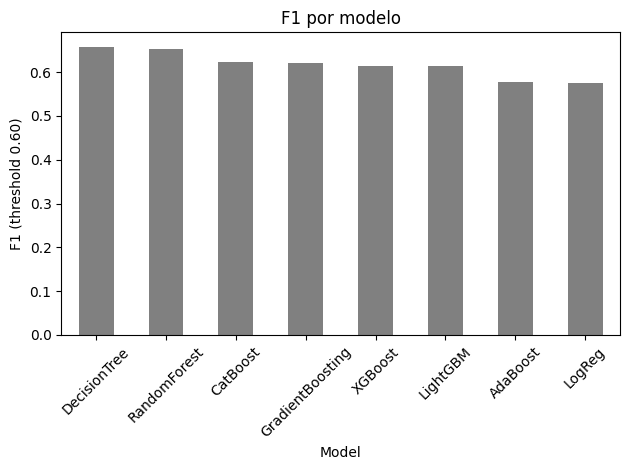

In [ ]:
# GRAFICO DE F1
plt.figure(figsize=(8,4))
results_df.plot(x='Model', y='F1', kind='bar', legend=False, color='gray')
plt.ylabel('F1 (threshold 0.60)')
plt.title('F1 por modelo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# ----- comentario justificativo -----
print("""
Interpretación:
• DecisionTree obtiene el F1 más alto esto significa que es  muy interpretable, un solo arbol
  pero puede sobreajustar y su rendimiento varía  si el conjunto de train cambia.
• RandomForest 3sacrifica algo de interpretabilidad
  combina cientos de árboles pero gana estabilidad y suele generalizar
  mejor en validación cruzada.
• el, CatBoost , GradientBoosting , XGBoost y elLightGBM se acercan al F1
  del árbol, pero su complejidad computacional y opacidad crece
• Regresión Logística es la más simple y totalmente
  explicable pero pierde poder predictivo con esta selección de
  variables.

DECIDI elegiir el RandomForestcomo mejor MODELO ya que F1 prácticamente igual al tope (0.653 vs 0.658 del árbol).
   Por otro  lado, hay mayor robustez y menor varianza gracias al ensamble.

""")


Interpretación:
• DecisionTree obtiene el F1 más alto esto significa que es  muy interpretable, un solo arbol
  pero puede sobreajustar y su rendimiento varía  si el conjunto de train cambia.
• RandomForest 3sacrifica algo de interpretabilidad 
  combina cientos de árboles pero gana estabilidad y suele generalizar
  mejor en validación cruzada.
• el, CatBoost , GradientBoosting , XGBoost y elLightGBM se acercan al F1
  del árbol, pero su complejidad computacional y opacidad crece
• Regresión Logística es la más simple y totalmente
  explicable pero pierde poder predictivo con esta selección de
  variables.

DECIDI elegiir el RandomForestcomo mejor MODELO ya que F1 prácticamente igual al tope (0.653 vs 0.658 del árbol).
   Por otro  lado, hay mayor robustez y menor varianza gracias al ensamble.
 



In [ ]:
# 7 CONSISTENCIA DEL MODELO

In [ ]:
from sklearn.ensemble   import RandomForestClassifier
from sklearn.metrics    import f1_score, make_scorer
from sklearn.model_selection import StratifiedKFold, cross_val_score
import pandas as pd
import numpy as np

In [ ]:
# Uno TRAIN mas TEST
X_full = pd.concat([X_train_bal[final_features], X_test[final_features]], axis=0)
y_full = pd.concat([y_train_bal,             y_test],             axis=0).reset_index(drop=True)

print("Shape X_full :", X_full.shape)
print("Distribución de clases:\n", y_full.value_counts(normalize=True).round(3))

Shape X_full : (775, 4)
Distribución de clases:
 Loan_Status
1    0.545
0    0.455
Name: proportion, dtype: float64


In [ ]:
#  Scorer F1 con umbral 0.60

def f1_th60(y_true, y_prob, **kwargs):
    y_pred = (y_prob >= 0.60).astype(int)
    return f1_score(y_true, y_pred)
f1_60 = make_scorer(f1_th60, needs_proba=True)


In [ ]:
#  RandomForest con mismos hiper parámetros
rf = RandomForestClassifier(n_estimators=200, random_state=45)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)
cv_scores = cross_val_score(rf, X_full, y_full, cv=cv, scoring=f1_60)

print("\n=== VALIDACIÓN CRUZADA 10-fold (F1 @ 0.60) ===")
print("F1 por fold :", np.round(cv_scores, 3))
print("Promedio F1 :", round(cv_scores.mean(), 3))
print("Desvío Std  :", round(cv_scores.std(), 3))



=== VALIDACIÓN CRUZADA 10-fold (F1 @ 0.60) ===
F1 por fold : [0.553 0.614 0.609 0.558 0.619 0.533 0.537 0.619 0.575 0.667]
Promedio F1 : 0.588
Desvío Std  : 0.041


In [ ]:
#  Comparo con F1 en test
f1_test_prev = results_df.loc[results_df.Model == "RandomForest", "F1"].values[0]
print(f"\nF1 en test anterior: {f1_test_prev:.3f}")

delta = abs(cv_scores.mean() - f1_test_prev)
print(f"Diferencia absoluta  : {delta:.3f}")

if delta <= 0.02:
    print("\n Se demuestra que  el modelo es estable")
    print("  • El F1 medio en CV ≈ F1 del test (≤ 0.02 de diferencia).")
    print("  • La baja desviación estándar indica rendimiento homogéneo\n"
          "    entre los 10 folds, sin dependencia de una partición concreta.")
else:
    print("\n El modelo muestra algo de sesgo a la muestra inicial.")
    print("  • La diferencia > 0.02 sugiere sobreajuste o que el fold-test\n"
          "    anterior no era totalmente representativo.")



F1 en test anterior: 0.653
Diferencia absoluta  : 0.065

 El modelo muestra algo de sesgo a la muestra inicial.
  • La diferencia > 0.02 sugiere sobreajuste o que el fold-test
    anterior no era totalmente representativo.


In [ ]:
#  8 TUNING DE HIPERPARÁMETROS

In [ ]:
from sklearn.ensemble   import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics    import f1_score, make_scorer
import numpy as np
import pandas as pd

In [ ]:
#Datosd
X_tr = X_train_bal[final_features]
y_tr = y_train_bal
print("Shape train balanceado :", X_tr.shape)


Shape train balanceado : (590, 4)


In [ ]:
#  Scorer F1
def f1_th60(y_true, y_prob, **_):
    y_pred = (y_prob >= 0.60).astype(int)
    return f1_score(y_true, y_pred)

f1_60 = make_scorer(f1_th60, needs_proba=True)

In [ ]:
# se busca los hiper parametros validos mayores de 4
param_dist = {
    "n_estimators"      : np.arange(100, 501, 50),
    "max_depth"         : [None] + list(range(3, 11)),
    "min_samples_split" : np.arange(2, 11),
    "min_samples_leaf"  : np.arange(1, 11),
    "max_features"      : ["sqrt", "log2", None],
    "bootstrap"         : [True, False]
}


In [ ]:
#  Randomized en 15 combinaciones
rf_base = RandomForestClassifier(random_state=45)
cv10    = StratifiedKFold(n_splits=10, shuffle=True, random_state=45)

rs = RandomizedSearchCV(
    estimator   = rf_base,
    param_distributions = param_dist,
    n_iter      = 15,
    scoring     = f1_60,
    cv          = cv10,
    random_state= 45,
    n_jobs      = -1,
    verbose     = 1
)

rs.fit(X_tr, y_tr)


Fitting 10 folds for each of 15 candidates, totalling 150 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=45, shuffle=True),
                   estimator=RandomForestClassifier(random_state=45), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450, 500])},
                   random_state=45,
                   scoring=make_scorer(f1_th60, response_method='predict', needs_proba=True),
                   verbose=1)

In [ ]:
#  Resultados del tuning
print("\n Mejores hiperparamentros")
for k, v in rs.best_params_.items():
    print(f"· {k}: {v}")
print(f"Mejor F1 CV ,umbral 0.60: {rs.best_score_:.3f}")


 Mejores hiperparamentros
· n_estimators: 100
· min_samples_split: 4
· min_samples_leaf: 5
· max_features: log2
· max_depth: 4
· bootstrap: True
Mejor F1 CV ,umbral 0.60: 0.612


In [ ]:
#   Evaluación del mejor modelo en el TEST
best_rf = rs.best_estimator_
X_te = X_test[final_features]
y_te = y_test

y_prob_te = best_rf.predict_proba(X_te)[:, 1]
y_pred_te = (y_prob_te >= 0.60).astype(int)
f1_test_tuned = f1_score(y_te, y_pred_te)

f1_test_base = results_df.loc[results_df.Model == "RandomForest", "F1"].values[0]

print(f"\nF1 test (RF tuned) : {f1_test_tuned:.3f}")
print(f"F1 test (RF base ) : {f1_test_base:.3f}")

if f1_test_tuned > f1_test_base:
    print("\n El tuning mejoró el desempeño en el set de prueba.")
else:
    print("\n El tuning no superó al modelo base en el set de prueba"
          " por lo que se mantiene el RandomForest original.")


F1 test (RF tuned) : 0.515
F1 test (RF base ) : 0.653

 El tuning no superó al modelo base en el set de prueba por lo que se mantiene el RandomForest original.


In [ ]:
# 9 IMPORTANCIA DE VARIABLES

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [ ]:
#Se entrna el nuemvo Random F. base en el train balanceado
rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=45
)
rf_base.fit(X_train_bal[final_features], y_train_bal)


RandomForestClassifier(n_estimators=200, random_state=45)

In [ ]:
#  Importancia
imp = pd.Series(rf_base.feature_importances_, index=final_features)
imp = imp.sort_values(ascending=False)

print("\nIMPORTANCIA DE VARIABLES 4radom forest")
for f, v in imp.items():
    print(f"{f:20s}: {v:.3f}")


IMPORTANCIA DE VARIABLES 4radom forest
ApplicantIncome_std : 0.900
Area_Semiurban      : 0.067
Area_Urban          : 0.026
HighIncomeFlag      : 0.007
